In [6]:
import sys
sys.path.insert(0, '..')

import random as rd
import math as mt
import numpy as np
import pandas as pd
from scipy.spatial.distance import pdist
from matplotlib import pyplot as plt

import dill as pickle
from time import gmtime, strftime

In [7]:
import graph_class as gc

from algorithms import ALGO_brute_force as eduBF
from algorithms import fabian_bruteForce as fabBF
from algorithms import brute_force_marco as marBF
from algorithms import kris_brute_force as kriBF
from algorithms import greedy as gd
from algorithms import antColonyOptimization as aco
from algorithms import divideAndConquer as divc
from algorithms import branchAndBound as bnb
from algorithms import branchAndBoundBinaryTree as bnbt
from algorithms import ALGO_simulated_annealing as sa
from algorithms import dynamicProgramming as dp
from algorithms import GA_Final_Kris as ga
from algorithms.random_approach_script_final import randomized_approach as rando
from algorithms.twoopt_script_final import two_opt as o2
from algorithms import mst_dfs_hamiltonian_script_final as mst


In [8]:
def createCoords(nCoords):
    coords = [[rd.randint(1,100),rd.randint(1,100)] for x in range(nCoords)]
    return coords

In [9]:
# Transforms coordinates input into an adjacency matrix
def coordWrapper(coords):
    adj_mat = np.zeros([len(coords),len(coords)])
    for idx in range(len(coords)):
        adj_mat[idx,idx] = np.inf
        for idx2 in range(idx+1,len(coords)):
            adj_mat[idx,idx2] = pdist([coords[idx],coords[idx2]])
            adj_mat[idx2,idx] = pdist([coords[idx],coords[idx2]])
    return adj_mat

## Compare BruteForce implementations

In [10]:
highN = 11
lowN = 6
t1 = np.zeros([highN-lowN,1])
t2 = np.zeros([highN-lowN,1])
t3 = np.zeros([highN-lowN,1])
t4 = np.zeros([highN-lowN,1])

for idx in range(lowN,highN):
    coords = createCoords(idx)
    graph = gc.fully_connected_graph_from_coordinate_list(coords,)
    
    resF, stuff, t1[idx-lowN] = fabBF.bruteForce(graph, 
                                                 symmetric=True,
                                                 preload=False)
    t2[idx-lowN], resK = kriBF.bruteForce(coords)
    t3[idx-lowN], resM = marBF.bruteForce(coords)
    t4[idx-lowN], resE, dummy = eduBF.brute_force(graph, 
                                                  max_iterations=mt.factorial(idx), 
                                                  return_graph=False)
    
    print("For", idx, "nodes:",resF, resK, resM, resE)

For 6 nodes: 298.0 298 298 298
For 7 nodes: 271.0 271 271 271
For 8 nodes: 273.0 273 273 273
For 9 nodes: 254.0 254 254 254
For 10 nodes: 259.0 259 259 259


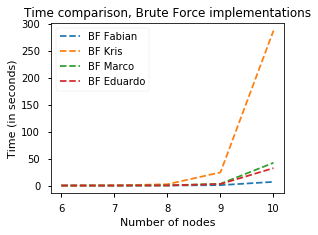

In [30]:
vals = np.transpose(np.squeeze([t1,t2,t3,t4]))
fig = plt.figure(figsize=(4,3))
plt.plot(range(lowN,highN),list(vals), '--')
plt.tight_layout()
plt.legend(['BF Fabian','BF Kris','BF Marco','BF Eduardo'])
plt.title('Time comparison, Brute Force implementations')
plt.xlabel('Number of nodes')
plt.ylabel('Time (in seconds)')
plt.savefig('../plots/compBruteForce.png',dpi=300, bbox_inches="tight")

## Compare exhaustive approaches

In [45]:
highN = 15
lowN = 8
t1 = np.ones([highN-lowN,1])
t2 = np.ones([highN-lowN,1])
t3 = np.ones([highN-lowN,1])
t4 = np.ones([highN-lowN,1])
t5 = np.ones([highN-lowN,1])

for idx in range(lowN,highN):
    coords = createCoords(idx)
    graph = gc.fully_connected_graph_from_coordinate_list(coords,)
    
    resF, pathF, t1[idx-lowN] = fabBF.bruteForce(graph,symmetric=True,preload=False)

    resM2, pathM, t2[idx-lowN] = bnb.BranchAndBound(graph,timed=True)
    
    
    resM3, stuff, t3[idx-lowN] = bnbt.BranchAndBoundBinaryTree(graph,timed=True)
    
    resM4, stuff, t4[idx-lowN] = divc.DivideAndConquer(graph,timed=True)
    resM5, stuff, t5[idx-lowN] = dp.DynamicProgramming(graph,timed=True)
    
    if idx<13:
        print("For", idx, "nodes:",resF, resM2, resM3, resM4, resM5)

For 8 nodes: 350.0 350.0 350.0 350.0 350.0
For 9 nodes: 282.0 282.0 282.0 282.0 282.0
For 10 nodes: 297.0 297.0 297.0 297.0 297.0
For 11 nodes: 250.0 250.0 250.0 250.0 250.0
For 12 nodes: 336.0 336.0 336.0 336.0 336.0


KeyboardInterrupt: 

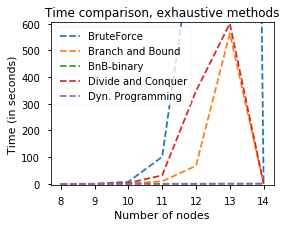

In [46]:
vals = np.transpose(np.squeeze([t1,t2,t3,t4,t5]))
plt.figure(figsize=(4,3))
plt.plot(range(lowN,highN),list(vals), '--')
plt.legend(['BruteForce','Branch and Bound','BnB-binary','Divide and Conquer','Dyn. Programming'])
plt.title('Time comparison, exhaustive methods')
plt.xlabel('Number of nodes')
plt.ylabel('Time (in seconds)')
plt.ylim([-5,605])
plt.savefig('../plots/compExhaustive.png', dpi=300, bbox_inches="tight")

## Reading in datasets

only considering datasets with <300, euclidean_2D

In [47]:
files = [['a280',2579],
         ['berlin52',7542],['bier127',118282],
         #['brd14051',np.inf]
         ['ch130',6110],['ch150',6528],
         ['d198',15780],
         #['d493',35002],['d657',48912],
         #['d1291',50801],['d1655',62128],['d18512',645238],
         ['eil51',426],['eil76',538],['eil101',629],
         #['fl417',11861],
         #['fl1400',20127],['fl1577',22249],['fl3795',28772],['fnl4461',182566],
         ['gil262',2378],['kroA150',26524],['kroA200',29368],['kroB100',22141],['kroB150',26130],['kroB200',29437],
         ['kroC100',20749],['kroD100',21294],['kroE100',22068],
         ['lin105',14379],
         #['lin318',42029],
         #['nrw1379',56638],
         #['p654',34643],['pcb442',50778],
         #['pcb1173',56892],
         ['pr76',108159],['pr107',44303],['pr124',59030],['pr136',96772],['pr144',58537],
         ['pr152',73682],
         ['pr226',80369],['pr264',49135],['pr299',48191],
         #['pr439',107217],
         #['pr1002',259045],['pr2392',378032],
         ['rat99',1211],['rat195',2323],
         #['rat575',6773],['rat783',8806],
         ['rd100',7910],
         #['rd400',15281],
         #['rl1304',252948],['rl1323',270199],['rl1889',316536],['rl5915',565530],['rl5934',556045],['rl11894',923288],
         ['ts225',126643],['u159',42080]
         #,['u574',36905],['u724',41910]#,
         #['u1060',224094],['u1432',152970],['u1817',57201],
         #['u2152',64253],['u2319',234256],['usa13509',19982859],['vm1084',239297],['vm1748',336556]
        ]

datasets = pd.ExcelFile("../data/Symmetrical TSP/all_data_euc2d.xlsx",header=None)

## Deterministic Algorithms

i.e. algorithms who always get the same result when called again.

In [5]:
res_deter = {}
res_deter['Dataset'] = []
# res_deter['Greedy'] = []
# res_deter['2-Opt'] = []
# res_deter['DynamicProgramming'] = []
# res_deter['BranchAndBound'] = []
# res_deter['BnB-binary'] = []
# res_deter['DivideAndConquer'] = []
res_deter['Hamiltonian'] = []

time_deter = {}
time_deter['Dataset'] = []
# time_deter['Greedy'] = []
# time_deter['2-Opt'] = []
# time_deter['DynamicProgramming'] = []
# time_deter['BranchAndBound'] = []
# time_deter['BnB-binary'] = []
# time_deter['DivideAndConquer'] = []
time_deter['Hamiltonian'] = []


for file in files:
    print("file:",file[0])
    data = np.array(pd.read_excel(datasets,file[0],header=None).iloc[:,1:])
    graph = gc.fully_connected_graph_from_coordinate_list(data)
    res_deter['Dataset'].append(file[0])
    time_deter['Dataset'].append(file[0])
#     res = gd.greedy(graph)
#     res_deter['Greedy'].append(res[0])
#     time_deter['Greedy'].append(res[2])
#     res = o2(data)
#     res_deter['2-Opt'].append(res[0])
#     time_deter['2-Opt'].append(res[2])
#     res = mst.mst_hamiltonian(graph)
# #         total_distance = total_distance + adj_mat[city_1][city_2] INDEX ERROR
    res_deter['Hamiltonian'].append(res[0]) 
    time_deter['Hamiltonian'].append(res[2])
#     res = dp.DynamicProgramming(graph,timed=True)
#     res_deter['DynamicProgramming'].append(res[0])
#     time_deter['DynamicProgramming'].append(res[2])
#     res = bnb.BranchAndBound(graph,timed=True) 
#     res_deter['BranchAndBound'].append(res[0])
#     time_deter['BranchAndBound'].append(res[2])
#     res = bnbt.BranchAndBoundBinaryTree(graph,timed=True)
#     res_deter['BnB-binary'].append(res[0])
#     time_deter['BnB-binary'].append(res[2])
#     res = divc.DivideAndConquer(graph,timed=True)
#     res_deter['DivideAndConquer'].append(res[0])
#     time_deter['DivideAndConquer'].append(res[2])
    
resD = pd.DataFrame.from_dict(res_deter)
timeD = pd.DataFrame.from_dict(time_deter)

t_stamp = gmtime()
file_Name = "../results/resDeterministic"+"_"+strftime("%Y-%m-%d_%H-%M-%S", t_stamp)
fileObject = open(file_Name, 'wb') 
pickle.dump(resD, fileObject)  
fileObject.close() 

t_stamp = gmtime()
file_Name = "../results/timeDeterministic"+"_"+strftime("%Y-%m-%d_%H-%M-%S", t_stamp)
fileObject = open(file_Name, 'wb') 
pickle.dump(timeD, fileObject)  
fileObject.close() 

file: a280
file: berlin52
file: bier127
file: ch130
file: ch150
file: d198
file: eil51
file: eil76
file: eil101
file: gil262
file: kroA150
file: kroA200
file: kroB100
file: kroB150
file: kroB200
file: kroC100
file: kroD100
file: kroE100
file: lin105
file: pr76
file: pr107
file: pr124
file: pr136
file: pr144
file: pr152
file: pr226
file: pr264
file: pr299
file: rat99
file: rat195
file: rd100
file: ts225
file: u159


## Algorithms with random elements 

i.e. who get different results when called multiple times


In [12]:
res_randos = {}

res_randos = {}
res_randos['Dataset'] = []
res_randos['AntColony'] = []
res_randos['GeneticAlgorithm'] = []
res_randos['SimmulatedAnnealing'] = []
res_randos['RandomizedApproach'] = []

time_randos = {}
time_randos['Dataset'] = []
time_randos['AntColony'] = []
time_randos['GeneticAlgorithm'] = []
time_randos['SimmulatedAnnealing'] = []
time_randos['RandomizedApproach'] = []

for file in files:
    print(file[0])
    data = np.array(pd.read_excel(datasets,file[0],header=None).iloc[:,1:])
    graph = gc.fully_connected_graph_from_coordinate_list(data)
    acos = []
    gas = []
    sas = []
    ras = []
    for runs in range(5):
        gas.append(ga.GA_approach(graph))
        ras.append(rando(data))
        sas.append(sa.simulated_annealing(graph))
    for runs in range(2):
        acos.append(aco.antColonyOptimization(graph))
        
    res_randos['Dataset'].append(file[0])
    time_randos['Dataset'].append(file[0])
    res = [np.mean([idx[0] for idx in acos]), np.std([idx[0] for idx in acos])]
    time = [np.mean([idx[2] for idx in acos]), np.std([idx[2] for idx in acos])] 
    res_randos['AntColony'].append(res)
    time_randos['AntColony'].append(time)
    res = [np.mean([idx[1] for idx in gas]), np.std([idx[1] for idx in gas])]
    time = [np.mean([idx[3] for idx in gas]), np.std([idx[3] for idx in gas])]
    res_randos['GeneticAlgorithm'].append(res)
    time_randos['GeneticAlgorithm'].append(time)
    res = [np.mean([idx[1] for idx in sas]),np.std([idx[1] for idx in sas])]
    time = [np.mean([idx[0] for idx in sas]),np.std([idx[0] for idx in sas])]
    res_randos['SimmulatedAnnealing'].append(res)
    time_randos['SimmulatedAnnealing'].append(time)
    res = [np.mean([idx[0] for idx in ras]),np.std([idx[0] for idx in ras])]
    time = [np.mean([idx[2] for idx in ras]),np.std([idx[2] for idx in ras])]
    res_randos['RandomizedApproach'].append(res)
    time_randos['RandomizedApproach'].append(time)
    

resR = pd.DataFrame.from_dict(res_randos)
timeR = pd.DataFrame.from_dict(time_randos)   

t_stamp = gmtime()
file_Name = "../results/resRandom"+"_"+strftime("%Y-%m-%d_%H-%M-%S", t_stamp)
fileObject = open(file_Name, 'wb') 
pickle.dump(resR, fileObject)  
fileObject.close() 

t_stamp = gmtime()
file_Name = "../results/timeRandom"+"_"+strftime("%Y-%m-%d_%H-%M-%S", t_stamp)
fileObject = open(file_Name, 'wb') 
pickle.dump(timeR, fileObject)  
fileObject.close() 

a280
berlin52
bier127
ch130
ch150
d198
eil51
eil76
eil101
gil262
kroA150
kroA200
kroB100
kroB150
kroB200
kroC100
kroD100
kroE100
lin105
pr76
pr107
pr124
pr136
pr144
pr152
pr226
pr264
pr299
rat99
rat195
rd100
ts225
u159


## Deterministic algorithms

In [48]:
lowestVals = [x[1] for x in files]
argSortNodes = np.argsort([len(pd.read_excel(datasets,x[0],header=None)) for x in files])
sortNodes = np.sort([len(pd.read_excel(datasets,x[0],header=None)) for x in files])

del lowestVals[20]
argSortNodes = np.delete(argSortNodes,20)
sortNodes = np.delete(sortNodes,20)

fileObject = open('../results/resDeterministic_2018-12-05_07-29-39', 'rb') 
r1 = pickle.load(fileObject)
fileObject = open('../results/resDeterministic_2018-12-07_15-36-17', 'rb') 
r2 = pickle.load(fileObject)
r = r1.merge(r2,on='Dataset')
r = r[r.Dataset!='pr107']
res = np.transpose(np.transpose(r.iloc[:,1:])/np.array(lowestVals))
res_si = res.drop(columns=['DynamicProgramming','BnB-binary','DivideAndConquer']).reindex(argSortNodes)

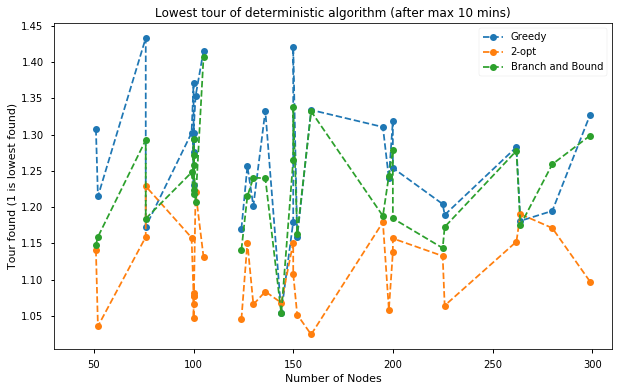

In [60]:
plt.figure(figsize=(10,6))
plt.plot(sortNodes,res_si,'--o')
plt.xlim(30,310)
plt.legend(['Greedy', '2-opt', 'Branch and Bound'])
plt.xlabel('Number of Nodes')
plt.ylabel('Tour found (1 is lowest found)')
plt.title('Lowest tour of deterministic algorithm (after max 10 mins)')
plt.savefig('../plots/compDeterministic.png', dpi=300, bbox_inches="tight")

## Random-based algorithms

In [51]:
fileObject = open('../results/resRandom_2018-12-06_07-34-14', 'rb') 
r1 = pickle.load(fileObject)
fileObject = open('../results/resRandom_2018-12-07_21-37-23', 'rb') 
r2 = pickle.load(fileObject)
r = r1.merge(r2,on='Dataset')
# r = r[r.Dataset!='pr107']
#r.drop(columns=['SimmulatedAnnealing_x','GeneticAlgorithm'])

In [52]:
lowestVals = [x[1] for x in files]
argSortNodes = np.argsort([len(pd.read_excel(datasets,x[0],header=None)) for x in files])

aco = r.AntColony
mean_a = np.array([x[0] for x in aco])/np.array(lowestVals)
std_a = np.array([x[1] for x in aco])/np.array(lowestVals)
ga = r.GeneticAlgorithm
mean_g = np.array([x[0] for x in ga])/np.array(lowestVals)
std_g = np.array([x[1] for x in ga])/np.array(lowestVals)
sa = r.SimmulatedAnnealing_y
mean_s = np.array([x[0] for x in sa])/np.array(lowestVals)
std_s = np.array([x[1] for x in sa])/np.array(lowestVals)
ra = r.RandomizedApproach
mean_r = np.array([x[0] for x in ra])/np.array(lowestVals)
std_r = np.array([x[1] for x in ra])/np.array(lowestVals)

res_mean = np.array([mean_a,mean_s,mean_g,mean_r])
res_std = np.array([std_a,std_s,std_g,std_r])

rm_si = np.array([res_mean[:,x] for x in argSortNodes])
rs_si = np.array([res_std[:,x] for x in argSortNodes])

rm_si = np.delete(rm_si,(20),axis=0)
rs_si = np.delete(rs_si,(20),axis=0)

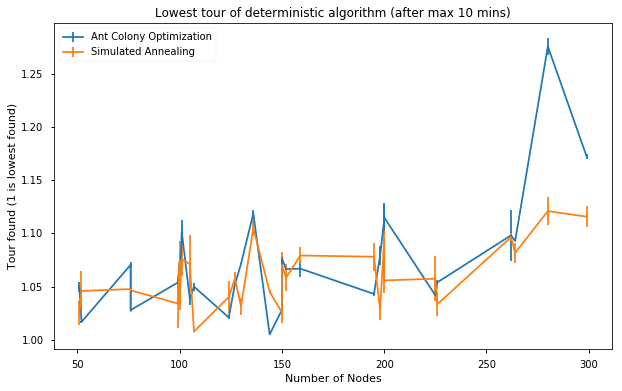

In [59]:
lowestVals = [x[1] for x in files]
argSortNodes = np.argsort([len(pd.read_excel(datasets,x[0],header=None)) for x in files])
sortNodes = np.sort([len(pd.read_excel(datasets,x[0],header=None)) for x in files])

del lowestVals[20]
argSortNodes = np.delete(argSortNodes,20)
sortNodes = np.delete(sortNodes,20)

plt.figure(figsize=(10,6))
for idx in range(rm_si.shape[1]-2):    
    plt.errorbar(sortNodes,rm_si[:,idx],yerr=rs_si[:,idx])

plt.legend(['Ant Colony Optimization','Simulated Annealing','Genetic Algorithm','Randomized Approach'])
plt.xlabel('Number of Nodes')
plt.ylabel('Tour found (1 is lowest found)')
plt.title('Lowest tour of deterministic algorithm (after max 10 mins)')
plt.savefig('../plots/compRandom.png', dpi=300, bbox_inches="tight")

## All (relevant) algos in one plot

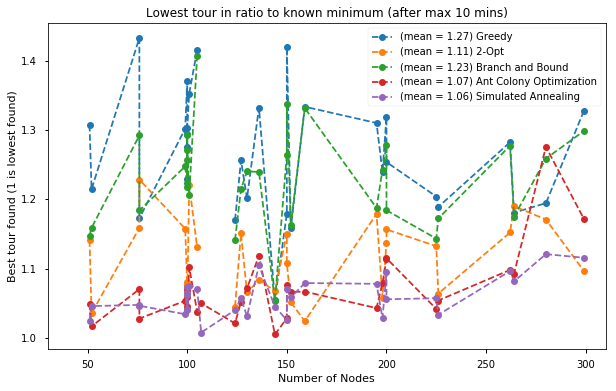

In [58]:
plt.figure(figsize=(10,6))
plt.plot(sortNodes,res_si,'--o')
plt.plot(sortNodes,rm_si[:,:2],'--o')
plt.xlim(30,310)
plt.legend(['(mean = 1.27) Greedy', '(mean = 1.11) 2-Opt', '(mean = 1.23) Branch and Bound','(mean = 1.07) Ant Colony Optimization','(mean = 1.06) Simulated Annealing'],loc='upper right')
plt.xlabel('Number of Nodes')
plt.ylabel('Best tour found (1 is lowest found)')
plt.title('Lowest tour in ratio to known minimum (after max 10 mins)')
plt.savefig('../plots/compAll.png', dpi=300, bbox_inches="tight")

## Outlier Algorithms

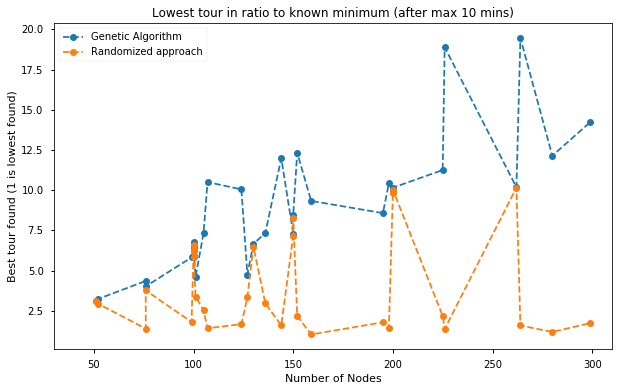

In [61]:
plt.figure(figsize=(10,6))
plt.plot(sortNodes,rm_si[:,2:],'--o')
plt.legend(['Genetic Algorithm','Randomized approach'])
plt.xlim(30,310)
plt.xlabel('Number of Nodes')
plt.ylabel('Best tour found (1 is lowest found)')
plt.title('Lowest tour in ratio to known minimum (after max 10 mins)')
plt.savefig('../plots/compRandom2.png', dpi=300, bbox_inches="tight")

In [249]:
print(np.mean(res_si,axis=0))
print(np.mean(rm_si,axis=0))

Greedy            1.267123
2-Opt             1.113200
BranchAndBound    1.229490
dtype: float64
[1.07155784 1.05977    8.70646706 3.98825276]


## Tables of results

In [247]:
r

,Dataset,Greedy,2-Opt,DynamicProgramming,BranchAndBound,BnB-binary,DivideAndConquer
0,a280,3081.0,3020,279.0,3247.0,inf,24.0
1,berlin52,9161.0,7810,3218.0,8740.0,inf,281.0
2,bier127,148614.0,136141,20289.0,143696.0,inf,1556.0
3,ch130,7341.0,6511,958.0,7579.0,inf,170.0
4,ch150,7700.0,7512,668.0,8256.0,inf,188.0
5,d198,19558.0,16700,3415.0,19614.0,inf,1177.0
6,eil51,557.0,486,124.0,489.0,inf,19.0
7,eil76,631.0,661,87.0,637.0,inf,23.0
8,eil101,851.0,768,120.0,759.0,inf,15.0
9,gil262,3050.0,2740,389.0,3038.0,inf,149.0


In [243]:
r

,Dataset,AntColony,GeneticAlgorithm,SimmulatedAnnealing_x,RandomizedApproach,SimmulatedAnnealing_y
0,a280,"[3290.5, 20.5]","[31309.6, 164.23958110029386]","[31076.2, 471.5741299096039]","[3066.0, 0.0]","[2891.0, 34.61791443747009]"
1,berlin52,"[7668.0, 6.0]","[24403.8, 569.8488922512705]","[23701.4, 339.27015783885264]","[22238.0, 0.0]","[7888.2, 141.05942010372792]"
2,bier127,"[124455.5, 56.5]","[563099.4, 12640.911179183247]","[553914.6, 8566.769206649611]","[394069.0, 0.0]","[125063.6, 781.2417295562238]"
3,ch130,"[6546.5, 2.5]","[40692.6, 324.4278656342577]","[40941.4, 194.07792249506383]","[39715.8, 596.1756117118512]","[6302.2, 49.454625668384146]"
4,ch150,"[6712.0, 12.0]","[47709.2, 461.7143705799073]","[47231.2, 645.7781043051863]","[46708.0, 547.727304413428]","[6695.6, 64.30738682297704]"
5,d198,"[17030.5, 138.5]","[164433.8, 3732.0148659939714]","[165755.6, 2577.1729162010065]","[22618.0, 0.0]","[16227.4, 158.1740813154924]"
6,eil51,"[447.0, 2.0]","[1339.6, 38.82576464153668]","[1344.8, 6.64529909033446]","[1334.0, 8.78635305459552]","[436.6, 4.8]"
7,eil76,"[553.0, 0.0]","[2163.8, 45.021772510642]","[2084.0, 34.05290002334603]","[2027.0, 0.0]","[563.0, 5.865151319446072]"
8,eil101,"[693.0, 7.0]","[2897.4, 10.892199043352083]","[2916.4, 57.440752084212825]","[2132.0, 0.0]","[676.6, 9.931767214348108]"
9,gil262,"[2611.5, 56.5]","[24218.0, 155.53906261772315]","[24539.2, 204.74706347100562]","[24154.0, 262.1663593979975]","[2607.4, 8.957678270623477]"
